<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Data Science</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>Bio Data-Science</b></font></div>
        </td>
    </tr>
</table>

---

# 2 Statistical Learning

## 2.1 Storing $Y$ and $X$ in a DataFrame

In data science, we use different tools (plots, statistical analysis, models, etc.) to generate knowledge from data. 
For instance, we can analyze how femur length is related to the hight of the person.

In this case, hight is $Y$ (the output variable) and femur length is $X$ (the only predictor, we have).

Creating a scatter plot is a simple tool to understand the data. The following code creates synthetic data and a scatter plot.

From the plot, we can reason:
- Interpret:
  - People with longer femurs are higher
  - There seems to be a linear relationship between $Y$ and $X$
  - We cannot see, whether $Y$ and $X$ are proportional (meet at the origin).  
-  Predict:
  - If we would like to predict the height of a person with a femur length of 41 cm, we could also do this by looking in the plot.

**Task**

✍️ What body hight would You predict for a femur length of 41cm?

Looking at the plot, our brain creates a model $f$ of the data. However, this model is hard to describe and share with others, as if does not have any structure or mathematical parameters.
Also, out brain is very good in creating linear models in two dimensions. Imaging, having additional predictors ($X_j$, e.g., country of origin, weight, gender, age, ...). This would, be much harder to analyze in a plot. Data science provides us with the tools, to get insights from more complex data.



🤓 This example works with simulated data. You can also use the data we collected [here](https://docs.google.com/spreadsheets/d/1NxCE0eVnNgMUUlpoq_5ZP8kTufB2s2njrbm3ti-SqGo/edit?usp=sharing). See [here](https://towardsdatascience.com/read-data-from-google-sheets-into-pandas-without-the-google-sheets-api-5c468536550#:~:text=All%20you%20need%20to%20do,a%20url%20pandas%20can%20read.&text=You%20can%20find%20the%20sheet,name%20you%20gave%20your%20sheet.) on how to do this.

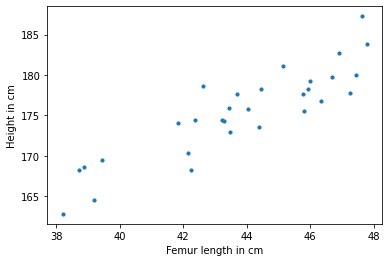

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

number_of_observations = 30

# generate random data-set
np.random.seed(0)
femur_length_in_cm = 38 + np.random.rand(number_of_observations,1) * 10
height_in_cm = 91.272 + 1.8172 * femur_length_in_cm + np.random.rand(number_of_observations, 1) * 10
## See https://actascientific.com/ASMI/pdf/ASMI-02-0399.pdf


# plot
plt.scatter(femur_length_in_cm,height_in_cm,s=10)
plt.xlabel('Femur length in cm')
plt.ylabel('Height in cm')
plt.show()

Next, we put the data in a DataFrame:

In [2]:
# Data Preparation
femur_length_in_cm = femur_length_in_cm.tolist()
height_in_cm = height_in_cm.tolist()

femur_length_in_cm

pos = 0
for i in femur_length_in_cm:
  femur_length_in_cm[pos] = i[0]
  pos = pos + 1 

pos = 0
for i in height_in_cm:
  height_in_cm[pos] = i[0]
  pos = pos + 1 

import pandas as pd

data = pd.DataFrame({'femur_length_in_cm': femur_length_in_cm,'height_in_cm': height_in_cm})
#data["femur_length_in_cm"] = data["femur_length_in_cm"][0][0]
#data["height_in_cm"] = data["height_in_cm"][0]

data

,femur_length_in_cm,height_in_cm
0,43.488135,172.944195
1,45.151894,181.064358
2,44.027634,175.840519
3,43.448832,175.911557
4,42.236548,168.212153
5,44.458941,178.239143
6,42.375872,174.398392
7,46.917730,182.700239
8,47.636628,187.274760
9,41.834415,174.111702


✍️ **Task**

- What is the predicted variable ($Y$) and what is the predictor ($X$) in the DateFrame above?
- Given the data and the scatter plot, should we use a linear model or a non-linear model to predict $Y$ from $X$?
- Given we choose a linear model, what is the intercept and the slope of the model?
- Can you write down the linear model?

## 2.2 Creating a Training and Test set

We learned, that it is useful to split the data we have into two different sets. The training set is used to train and learn our models. On the test set, we can evaluate, how the trained model performs on unseen data. 

When splitting the data, we should have no systematic bias (e.g., by putting only the smallest people in the test set). 

✍️ **Task**

Create a new column named "Set" in the Dataframe ```data```, that marks whether the observation belongs to the training or test set (i.e., fill the column with ```"Training"``` or ```"Test"```). Assign 25% of the data to the test set.

In [9]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
import numpy as np

data["Set"] = "Training"
data

test_counter = data.shape[0] * 0.25

data.loc[0:test_counter,"Set"] = "Test"
data

,femur_length_in_cm,height_in_cm,Set
0,43.488135,172.944195,Test
1,45.151894,181.064358,Test
2,44.027634,175.840519,Test
3,43.448832,175.911557,Test
4,42.236548,168.212153,Test
5,44.458941,178.239143,Test
6,42.375872,174.398392,Test
7,46.917730,182.700239,Test
8,47.636628,187.274760,Training
9,41.834415,174.111702,Training


Create a new scatter plot that also marks the set the observations belong to (```hue = "Set"```).

<Axes: xlabel='femur_length_in_cm', ylabel='height_in_cm'>

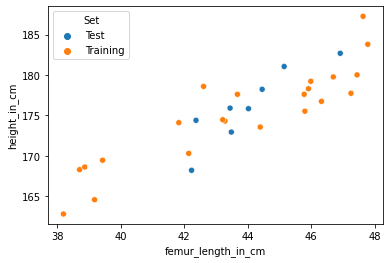

In [10]:
# Plot that shows what observation belongs to training and test set
import seaborn as sns

sns.scatterplot(data=data, x="femur_length_in_cm", y="height_in_cm", hue="Set")

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## 2.3 Training Models on a Test Set

Next, we train a simpel parametric model. This means, we decide for a structure of the model and then find the best parameters to fit the model to the training set.

First, we deicide for a simple linear regression model (more in the next session). Basically, we put a line through the data. The line has two parameters 
- intercept on the $y$ axis also called  $\beta_0$
- slope: how much does $y$ change, if $X$ changes. The slope of the first predictor ($X_1$) is noted with $\beta_1$

✍️ **Task**

What are the units of measurements of $\beta_0$ and $\beta_1$?


In [19]:
# Importing scikit-learn package
from sklearn.linear_model import LinearRegression

# Selecting only the training data
training_data = data[data["Set"]=="Training"]
test_data = data[data["Set"]=="Test"]


# Defining the predicted variable y and predictor X
X = training_data[["femur_length_in_cm"]]
y = training_data[["height_in_cm"]]

# Define, that we want to take a linear regression as a model f
f = LinearRegression()

# Fitting Simple Linear Regression to the test set
f.fit(X, y)


LinearRegression()

In [12]:
# \beta_0: cm
# \beta_q: 1

### Interpreting the Parameters

As we choose a parametric model, we can check for the parameters of the fitted model $\hat{f}$. 

When, we simulated the data, we used the following formula:

```Python
height_in_cm = 91.272 + 1.8172 * femur_length_in_cm + np.random.rand(number_of_observations, 1) * 10
``` 

This means, we generated a line with intercept of $91.282$ and slope of $1.8187$ and added some random noise to it.

The model, we created with the training data, has similar parameters, but does not estimate them perfectly:

In [13]:
# The following section will get results by interpreting the created instance: 

# Print the Intercept:
print('intercept (beta_0):', f.intercept_)

# Print the Slope:
print('slope (beta_1):', f.coef_) 


intercept (beta_0): [102.71150765]
slope (beta_1): [[1.65565285]]


To vizualize the model, we can create a list of all possible femur lengths and use the model to make a prediction of the body heigth for each of them:



In [14]:
# As our plot goes from 38-49 cm, we also want to make predictions for these relevant x-values
# relevant_x_values = np.asarray([*range(38, 49, 1)]).reshape(-1, 1)
relevant_x_values = np.linspace(38, 49, num=100).reshape(-1, 1)
relevant_x_values


array([[38.        ],
       [38.11111111],
       [38.22222222],
       [38.33333333],
       [38.44444444],
       [38.55555556],
       [38.66666667],
       [38.77777778],
       [38.88888889],
       [39.        ],
       [39.11111111],
       [39.22222222],
       [39.33333333],
       [39.44444444],
       [39.55555556],
       [39.66666667],
       [39.77777778],
       [39.88888889],
       [40.        ],
       [40.11111111],
       [40.22222222],
       [40.33333333],
       [40.44444444],
       [40.55555556],
       [40.66666667],
       [40.77777778],
       [40.88888889],
       [41.        ],
       [41.11111111],
       [41.22222222],
       [41.33333333],
       [41.44444444],
       [41.55555556],
       [41.66666667],
       [41.77777778],
       [41.88888889],
       [42.        ],
       [42.11111111],
       [42.22222222],
       [42.33333333],
       [42.44444444],
       [42.55555556],
       [42.66666667],
       [42.77777778],
       [42.88888889],
       [43

We can now put this new data for $X$ into the models ```predict()``` function, to make predictions for $y$

$\vec{y} = \hat{f}(X) = 102.71 \text{ cm} + 1.66 \frac{\text{ cm}}{\text{ cm}} \times X $

In [21]:
# Predicting the set results
y_pred = f.predict(relevant_x_values)
y_pred

C:\Users\JLHUBER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[165.62631588],
       [165.81027731],
       [165.99423874],
       [166.17820017],
       [166.3621616 ],
       [166.54612302],
       [166.73008445],
       [166.91404588],
       [167.09800731],
       [167.28196873],
       [167.46593016],
       [167.64989159],
       [167.83385302],
       [168.01781444],
       [168.20177587],
       [168.3857373 ],
       [168.56969873],
       [168.75366015],
       [168.93762158],
       [169.12158301],
       [169.30554444],
       [169.48950586],
       [169.67346729],
       [169.85742872],
       [170.04139015],
       [170.22535157],
       [170.409313  ],
       [170.59327443],
       [170.77723586],
       [170.96119728],
       [171.14515871],
       [171.32912014],
       [171.51308157],
       [171.697043  ],
       [171.88100442],
       [172.06496585],
       [172.24892728],
       [172.43288871],
       [172.61685013],
       [172.80081156],
       [172.98477299],
       [173.16873442],
       [173.35269584],
       [173

Vizualizing the model $f$ as a blue line and the training observations as red dots, we see that the regression line is a good fit to the data:

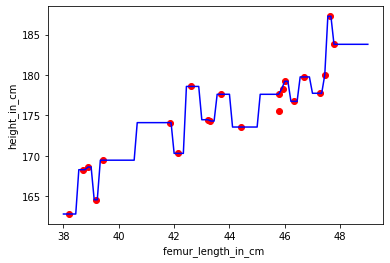

In [20]:
# Visualizing the set results
plt.scatter(X, y, color = 'red')
plt.plot(relevant_x_values, y_pred, color = 'blue')
plt.xlabel('femur_length_in_cm ')
plt.ylabel('height_in_cm')
plt.show()

## 2.4 Preventing Non-Parametric Models from Over-Fitting

In contrast, we can also train a more flexible model, to fit the data even better. Non-Parametric models are more flexible, but are harder to interpret, as they have no clear mathematical form (e.g., a regression line with parameters intercept and slope).

For instance, we can use a decision tree as a model. A decision tree is a simple, non-parametric model, that can be used for regression tasks.

To apply a decision tree to the data, we only have to change the model (```DecisionTreeRegressor()```) from thee sklearn package.

C:\Users\JLHUBER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


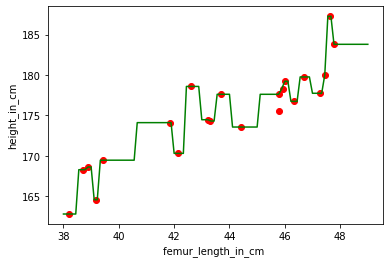

In [18]:
from sklearn import tree


tree_model = tree.DecisionTreeRegressor()
tree_model = tree_model.fit(X,y)

y_pred = tree_model.predict(relevant_x_values)

plt.scatter(X, y, color = 'red')
plt.plot(relevant_x_values, y_pred, color = 'green')
plt.xlabel('femur_length_in_cm ')
plt.ylabel('height_in_cm')
plt.show()


We see, that the decision tree model (green) takes an effort, to fit the data. However, it is hard to say, whether the model overfits the data or the realtion between femur length and height really follows this complex line.

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## 2.4 Calculate the Mean Squared Error

To see, which model is better on unseen data and whether the decision tree really over-fits the data, we can evaluate the models' performance based on an numeric accuracy measure like the MSE: 

$$\text{MSE} = \frac{1}{n}  \sum_{i=1}^n(y_i-\hat{f}(x_i))^2$$

The next two cells store the predictions of the two models in the original data frame creating the new columns (```Prediction_Linear``` and ```Prediction_Tree```)

🏆  **Task**

Calculate the $MSE$ in the test set and the training set for both models.

In [22]:
data.head()

,femur_length_in_cm,height_in_cm,Set
0,43.488135,172.944195,Test
1,45.151894,181.064358,Test
2,44.027634,175.840519,Test
3,43.448832,175.911557,Test
4,42.236548,168.212153,Test


In [23]:
# We start by adding a new column to the data frame, which has all the predictions of both models
data["Prediction_Linear"] = f.predict(data["femur_length_in_cm"].to_numpy().reshape(-1, 1))
data["Prediction_Tree"] = tree_model.predict(data["femur_length_in_cm"].to_numpy().reshape(-1, 1))
data

C:\Users\JLHUBER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\JLHUBER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


,femur_length_in_cm,height_in_cm,Set,Prediction_Linear,Prediction_Tree
0,43.488135,172.944195,Test,174.712762,177.624418
1,45.151894,181.064358,Test,177.467369,177.620548
2,44.027634,175.840519,Test,175.605985,177.624418
3,43.448832,175.911557,Test,174.647690,174.306998
4,42.236548,168.212153,Test,172.640569,170.305093
5,44.458941,178.239143,Test,176.320080,173.567340
6,42.375872,174.398392,Test,172.871241,170.305093
7,46.917730,182.700239,Test,180.390981,179.772568
8,47.636628,187.274760,Training,181.581226,187.274760
9,41.834415,174.111702,Training,171.974776,174.111702


*Hint*:

You can start by adding new columns to calculate the Squared Error for both models and use a group-by an mean operation after.

In [25]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
data["SquaredError_Tree"] = (data["height_in_cm"]-data["Prediction_Tree"])**2
data["SquaredError_Linear"] = (data["height_in_cm"]-data["Prediction_Linear"])**2
data.head()

,femur_length_in_cm,height_in_cm,Set,Prediction_Linear,Prediction_Tree,SquaredError_Tree,SquaredError_Linear
0,43.488135,172.944195,Test,174.712762,177.624418,21.904484,3.127830
1,45.151894,181.064358,Test,177.467369,177.620548,11.859828,12.938330
2,44.027634,175.840519,Test,175.605985,177.624418,3.182293,0.055006
3,43.448832,175.911557,Test,174.647690,174.306998,2.574609,1.597359
4,42.236548,168.212153,Test,172.640569,170.305093,4.380396,19.610865


In [26]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
data.groupby("Set").mean()

,femur_length_in_cm,height_in_cm,Prediction_Linear,Prediction_Tree,SquaredError_Tree,SquaredError_Linear
Set,,,,,,
Test,44.013198,176.163820,175.582085,175.140809,11.381713,6.084632
Training,43.737751,175.126039,175.126039,175.126039,0.000000,6.498807


### Interpretation

On the traing set, we see that the Decision Tree model has a perfect fit ($MSE=0$) while the linear model fits the data far worse ($MSE=11.38$).

However, the linear model obtains better results on the unseen test set compared to the decion tree. This is a clear indicator, that the decision three *overfits* the data.



🏆 **Task**

- Which of the model has a higher variance, which a higher bias?
- For both models: Create a scatter plot of the predictions and data of the test set.


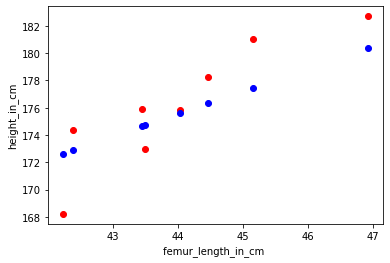

In [27]:
# Visualizing the set results

# Defining the predicted variable y and predictor X
X = test_data[["femur_length_in_cm"]]
y = test_data[["height_in_cm"]]

plt.scatter(X, y, color = 'red')


plt.scatter(X, f.predict(X), color = 'blue')
plt.xlabel('femur_length_in_cm ')
plt.ylabel('height_in_cm')
plt.show()

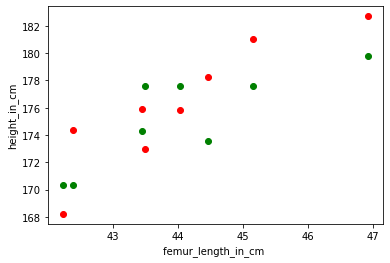

In [36]:
# Visualising the set results

# Defining the predicted variable y and predictor X
X = test_data[["femur_length_in_cm"]]
y = test_data[["height_in_cm"]]

plt.scatter(X, y, color = 'red')


plt.scatter(X, tree_model.predict(X), color = 'green')
plt.xlabel('femur_length_in_cm ')
plt.ylabel('height_in_cm')
plt.show()

In [37]:
# The decision tree has a very high flexibility an can therefore fit the training data perfectly. In result, the model would look very different any time you change the composition on the training data. This indicates a high variance. 

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)